In [1]:
import os
from stylecopypaste.datasets.taco import taco
from stylecopypaste.datasets.dashlit import dashlit
gv_ann= r"C:\Users\Computing\OneDrive - University of Lincoln\MSc Intelligent Vision\Project\paper\ann_dataset\train"
gv_ann_ims = os.path.join(gv_ann,"images")
gv_ann_labels= os.path.join(gv_ann,"labels")

#get dashlit samples
dash_samps = dashlit(im_p=gv_ann_ims, lab_p=gv_ann_labels)
dash_samps.getDashlit(0,100)

#get taco samples
taco_samps = taco(r"C:\Users\Computing\OneDrive - University of Lincoln\MSc Intelligent Vision\Project\copy-paste\TACO\TACO-master\data")

ids = range(0,100)
taco_samps.getTaco(ids)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 24.16it/s]


loading annotations into memory...
Done (t=0.08s)
creating index...
index created!


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.98it/s]


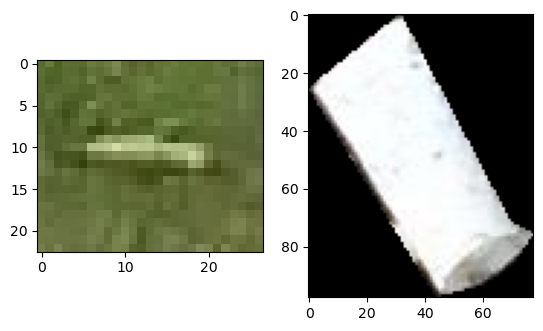

In [2]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.imshow(dash_samps.litIms[50])
plt.subplot(1,2,2)
plt.imshow(taco_samps.litIms[50])

In [3]:
from stylecopypaste.style.transfer import t_model
import numpy as np
import tensorflow as tf
model = t_model(imsize= 96,weightspath= r"C:\Users\Computing\OneDrive - University of Lincoln\MSc Intelligent Vision\Project\copy-paste\style_checkpoints\litter_style_checkpoint")

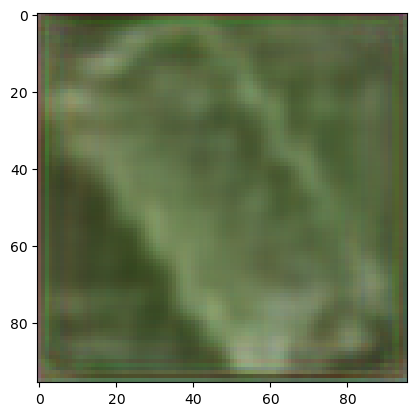

In [4]:
style = np.array(dash_samps.litIms[50])
style = tf.expand_dims(tf.convert_to_tensor(style),axis=0)

content = np.array(taco_samps.litIms[50])
c_shape = content.shape
content = tf.expand_dims(tf.convert_to_tensor(content),axis=0)

nst_im = model.transferStyle(style,content).numpy()
plt.imshow(nst_im)

#resize mask
import cv2
new_mask= cv2.resize(taco_samps.litMasks[50], (96,96))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.74it/s]


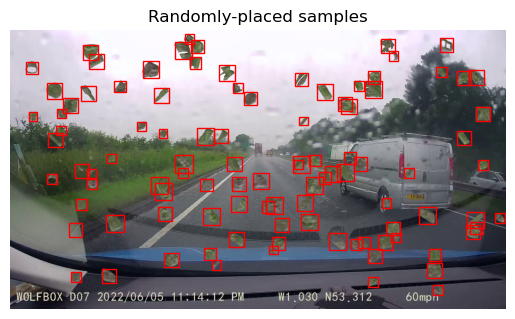

In [10]:
from stylecopypaste.copypaste.paste import rand_paste
from tqdm import tqdm

def getVerge(p):
    return cv2.cvtColor(cv2.imread(p),cv2.COLOR_BGR2RGB)

verge = getVerge(r"C:\Users\Computing\OneDrive - University of Lincoln\MSc Intelligent Vision\Project\segmentation\seg_dataset\gv_seg\20220605231413_000097_Trim_frame2.jpg")

pasting_lit = []
pasting_masks = []

for i in tqdm(range(0,len(taco_samps.litIms))):
    
    style = np.array(dash_samps.litIms[i])
    style = tf.expand_dims(tf.convert_to_tensor(style),axis=0)

    content = np.array(taco_samps.litIms[i])
    c_shape = content.shape
    content = tf.expand_dims(tf.convert_to_tensor(content),axis=0)

    nst_im = model.transferStyle(style,content).numpy()

    #resize mask
    new_mask= cv2.resize(taco_samps.litMasks[i], (96,96))
    lit = nst_im*255 #denormalise
    lit = cv2.bitwise_and(lit,lit,mask = new_mask)
    pasting_lit.append(lit)
    pasting_masks.append(new_mask)

result = rand_paste(pasting_lit,pasting_masks,verge,show=True)

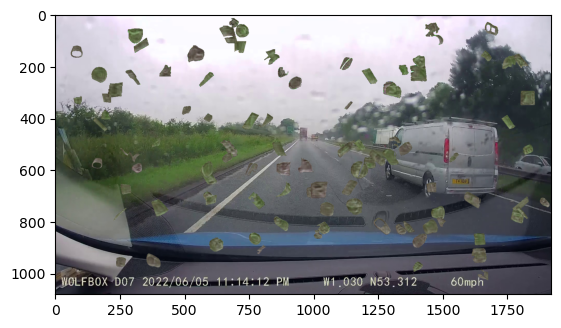

In [11]:
#finish style transfer copy-paste, make end solution
plt.imshow(result)